<a href="https://colab.research.google.com/github/Victorrani/applied-programming-exercises/blob/main/SkewT_LogP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Código que transforma o arquivo .txt do site (https://weather.uwyo.edu/upperair/sounding.html) e transforma em um plot de skewTlogP.


---





In [1]:
pip install metpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
##Bibliotecas importadas

import pandas as pd 
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import metpy.calc as mpcalc
from metpy.plots import Hodograph, SkewT
from metpy.units import units
import csv

No site (https://weather.uwyo.edu/upperair/sounding.html), selecione o local, a data e a estação e no campo "Type fo plot" escolha a opção "Text: List"

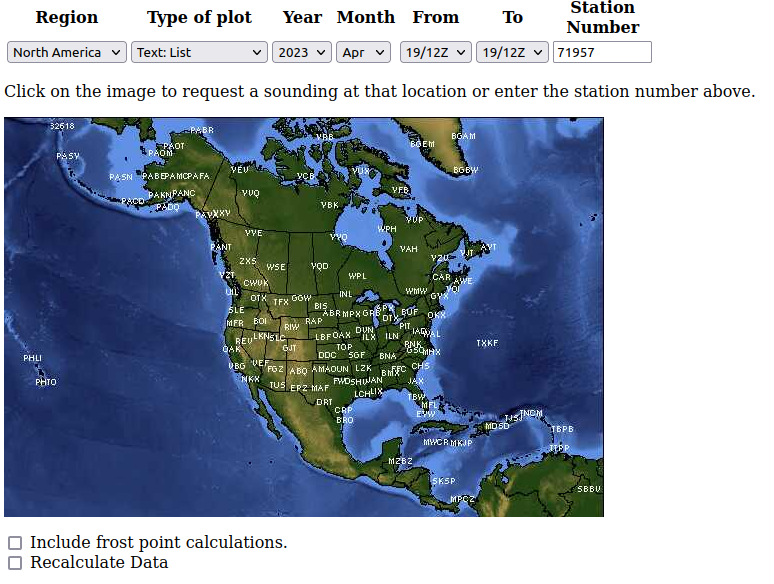

Copie o endereço da página (URL) e execute o bloco de código seguinte. Cole o endereço URL no campo "site".

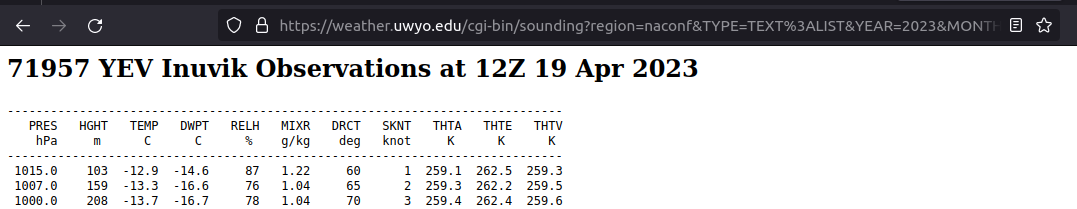

In [3]:
site = str(input('Digite o URL do site: '))

Digite o URL do site: https://weather.uwyo.edu/cgi-bin/sounding?region=seasia&TYPE=TEXT%3ALIST&YEAR=2023&MONTH=04&FROM=1912&TO=1912&STNM=44292


Execute essa célula até aparecer as informações da estação escolhida juntamente com sua tabela


---
Caso ocorra erro, tente até funcioar. 


In [4]:
## Fazer a requisição HTTP para a página web
url = site ##
response = requests.get(url, verify=False)

# Verificar se a requisição foi bem sucedida
if response.status_code == 200:
    # Parsear o HTML usando o BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Encontrar a tag <pre> no HTML
    pre_tag = soup.find('pre')
    h2_tag = soup.find('h2')
    
    texto = pre_tag.get_text()
    texto_inicial = h2_tag.get_text()
    
    print(texto_inicial)
    print(texto)
  
else:
    print('Falha ao obter o conteúdo da página. Código de status HTTP:', response.status_code)


/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'weather.uwyo.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


44292  Ulaan-Baator Observations at 12Z 19 Apr 2023

-----------------------------------------------------------------------------
   PRES   HGHT   TEMP   DWPT   RELH   MIXR   DRCT   SKNT   THTA   THTE   THTV
    hPa     m      C      C      %    g/kg    deg   knot     K      K      K 
-----------------------------------------------------------------------------
 1000.0    146                                                               
  865.0   1306   -0.3  -18.3     24   1.05    260      6  284.4  287.7  284.6
  850.0   1446   -1.5  -18.5     26   1.05    250      6  284.6  287.8  284.7
  700.0   2952  -15.1  -28.1     32   0.54    280     31  285.7  287.5  285.8
  679.0   3181  -17.1  -30.1     31   0.46    281     34  286.0  287.5  286.1
  577.0   4372  -28.7  -33.0     66   0.41    289     50  286.0  287.4  286.1
  539.0   4855  -32.7  -37.7     61   0.28    292     57  286.9  287.8  286.9
  500.0   5380  -35.9  -47.9     28   0.10    295     64  289.2  289.6  289.2
  490.0   5

Tratamento do dado, transformando o .txt em pandas dataFrame. Parte difícil

In [5]:
# Separa as linhas do texto em uma lista
linhas = texto.split('\n')

# Remove as linhas em branco
linhas = [linha for linha in linhas if linha.strip()]

# Cria o arquivo CSV com separador ';'
with open('dados_atmosfericos.csv', 'w', newline='') as arquivo_csv:
    escritor_csv = csv.writer(arquivo_csv, delimiter=';')

    # Escreve as linhas no arquivo CSV
    for linha in linhas:
      valores = linha.split()
      escritor_csv.writerow(valores)

In [6]:
# Abre o arquivo CSV e lê as linhas
with open('dados_atmosfericos.csv', 'r', newline='') as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv, delimiter=';')
    linhas = [linha for linha in leitor_csv]

# Imprime as linhas lidas do arquivo CSV
for linha in linhas:
    print(linha)


['-----------------------------------------------------------------------------']
['PRES', 'HGHT', 'TEMP', 'DWPT', 'RELH', 'MIXR', 'DRCT', 'SKNT', 'THTA', 'THTE', 'THTV']
['hPa', 'm', 'C', 'C', '%', 'g/kg', 'deg', 'knot', 'K', 'K', 'K']
['-----------------------------------------------------------------------------']
['1000.0', '146']
['865.0', '1306', '-0.3', '-18.3', '24', '1.05', '260', '6', '284.4', '287.7', '284.6']
['850.0', '1446', '-1.5', '-18.5', '26', '1.05', '250', '6', '284.6', '287.8', '284.7']
['700.0', '2952', '-15.1', '-28.1', '32', '0.54', '280', '31', '285.7', '287.5', '285.8']
['679.0', '3181', '-17.1', '-30.1', '31', '0.46', '281', '34', '286.0', '287.5', '286.1']
['577.0', '4372', '-28.7', '-33.0', '66', '0.41', '289', '50', '286.0', '287.4', '286.1']
['539.0', '4855', '-32.7', '-37.7', '61', '0.28', '292', '57', '286.9', '287.8', '286.9']
['500.0', '5380', '-35.9', '-47.9', '28', '0.10', '295', '64', '289.2', '289.6', '289.2']
['490.0', '5520', '-35.3', '-51.3', '

Retirando as linhas com "------"


In [7]:
# Abre o arquivo CSV e lê as linhas
with open('dados_atmosfericos.csv', 'r', newline='') as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv, delimiter=';')
    linhas = [linha for linha in leitor_csv]

# Remove a primeira e a terceira linha
linhas = linhas[1:3] + linhas[4:]

# Escreve as linhas restantes em um novo arquivo CSV
with open('dados_atmosfericos_sem_cabecalho.csv', 'w', newline='') as novo_arquivo_csv:
    escritor_csv = csv.writer(novo_arquivo_csv, delimiter=';')
    escritor_csv.writerows(linhas)


Criação do DataFrame. Repare que a linha 0 contem as unidades de medida. 

In [8]:
df = pd.read_csv('dados_atmosfericos_sem_cabecalho.csv', sep=';')
df.head()

,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT,THTA,THTE,THTV
0,hPa,m,C,C,%,g/kg,deg,knot,K,K,K
1,1000.0,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,865.0,1306,-0.3,-18.3,24,1.05,260,6,284.4,287.7,284.6
3,850.0,1446,-1.5,-18.5,26,1.05,250,6,284.6,287.8,284.7
4,700.0,2952,-15.1,-28.1,32,0.54,280,31,285.7,287.5,285.8


Arrumando o problema

In [9]:
new_columns = []
for i in range(len(df.columns)):
  col1 = df.columns[i] + f' ({df.values[0][i]})'
  new_columns.append(col1)

df.columns = new_columns

new_df = df.drop(df.index[0])
new_df.head()

,PRES (hPa),HGHT (m),TEMP (C),DWPT (C),RELH (%),MIXR (g/kg),DRCT (deg),SKNT (knot),THTA (K),THTE (K),THTV (K)
1,1000.0,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,865.0,1306,-0.3,-18.3,24,1.05,260,6,284.4,287.7,284.6
3,850.0,1446,-1.5,-18.5,26,1.05,250,6,284.6,287.8,284.7
4,700.0,2952,-15.1,-28.1,32,0.54,280,31,285.7,287.5,285.8
5,679.0,3181,-17.1,-30.1,31,0.46,281,34,286.0,287.5,286.1


Retirando qualquer linha que contenha dados faltantes

In [10]:
new_df = new_df.dropna(subset=['PRES (hPa)', 	'HGHT (m)', 	'TEMP (C)',
                                'DWPT (C)', 	'RELH (%)', 	'MIXR (g/kg)',
                                'DRCT (deg)', 	'SKNT (knot)', 	'THTA (K)',
                                'THTE (K)', 	'THTV (K)'])
new_df

,PRES (hPa),HGHT (m),TEMP (C),DWPT (C),RELH (%),MIXR (g/kg),DRCT (deg),SKNT (knot),THTA (K),THTE (K),THTV (K)
2,865.0,1306,-0.3,-18.3,24,1.05,260,6,284.4,287.7,284.6
3,850.0,1446,-1.5,-18.5,26,1.05,250,6,284.6,287.8,284.7
4,700.0,2952,-15.1,-28.1,32,0.54,280,31,285.7,287.5,285.8
5,679.0,3181,-17.1,-30.1,31,0.46,281,34,286.0,287.5,286.1
6,577.0,4372,-28.7,-33.0,66,0.41,289,50,286.0,287.4,286.1
7,539.0,4855,-32.7,-37.7,61,0.28,292,57,286.9,287.8,286.9
8,500.0,5380,-35.9,-47.9,28,0.10,295,64,289.2,289.6,289.2
9,490.0,5520,-35.3,-51.3,18,0.07,290,76,291.6,291.9,291.6
10,456.0,6024,-32.3,-57.3,6,0.04,283,91,301.4,301.6,301.4
11,400.0,6940,-35.9,-60.9,6,0.03,270,118,308.2,308.4,308.3


Plot

In [11]:
##Definição das variáveis
p = new_df['PRES (hPa)'].values * units.hPa
T = new_df['TEMP (C)'].values * units.degC
Td = new_df['DWPT (C)'].values * units.degC
wind_speed = new_df['SKNT (knot)'].values * units.knots
wind_dir = new_df['DRCT (deg)'].values * units.degrees
#u, v = mpcalc.wind_components(wind_speed, wind_dir)

<ipython-input-12-bb414edde890>:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  skew.ax.set_ylim(1050, 0)


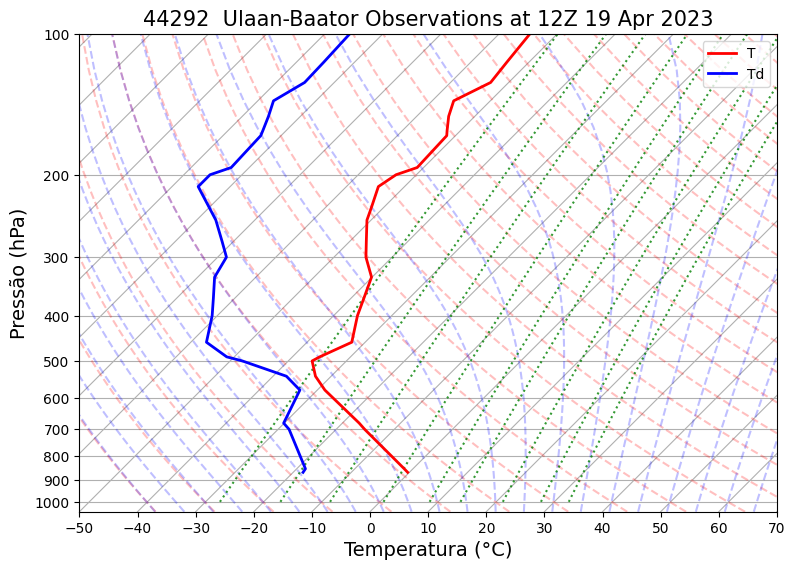

In [12]:
import numpy as np
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

skew.plot(p, T, 'r', linewidth=2)
skew.plot(p, Td, 'b', linewidth=2)
#skew.plot_barbs(p, u, v)

skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines(pressure=np.arange(1000, 20, -5) * units.hPa,
                       linestyle='dotted', color='tab:blue')

skew.ax.set_xlim(-50, 70)
skew.ax.set_ylim(1050, 0)

plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Pressão (hPa)', fontsize=14)
#plt.title(f'Perfil vertical da temperatura (°C)\n {DIA}/{MES}/{ANO} {HORA}Z\n Estação: {ESTACAO}', 
          #fontsize=15, ha='center')
plt.title(f'{texto_inicial}', fontsize=15, ha='center')
plt.legend(['T', 'Td'])


plt.show()
